# <font color=green><center>**Phase 4**</center></font>

***

# Importing necessary Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from scipy.stats import norm,skew
from sklearn import preprocessing  
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from numpy import mean
from numpy import std
from xgboost import XGBRegressor


# Loading Dataset

Loading the Dataset which we have preprocessed already in the last phase.

In [2]:
train_data=pd.read_csv("preprocessed_train_df.csv")
test_data=pd.read_csv("preprocessed_test_df.csv")


In [3]:
test=pd.read_csv("test.csv")

# Dataset Overview

In [4]:
# No. of records and dimensions respectively
train_data.shape, test_data.shape

((134, 44), (100000, 43))

In [5]:
train_data.head()

,Unnamed: 0,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue_log
0,0,7,1999,16,0,2,4,5.0,4.0,4.0,...,3.0,5,3,4,5,5,4,3,4,15.547830
1,1,2,2008,7,0,1,4,5.0,4.0,4.0,...,3.0,0,0,0,0,0,0,0,0,15.750379
2,2,3,2013,2,1,2,2,4.0,2.0,5.0,...,3.0,0,0,0,0,0,0,0,0,14.535971
3,3,2,2012,3,1,2,6,4.5,6.0,6.0,...,7.5,25,12,10,6,18,12,12,6,14.799651
4,4,5,2009,6,1,2,3,4.0,3.0,4.0,...,3.0,5,1,3,2,3,4,3,3,15.278005


# Dropping the index column 

In [6]:
train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
test_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
#Splitting the train dataset as inputs and targets
x_train=train_data.drop(['revenue_log'],axis=1)#input variables
y_train=train_data['revenue_log']#target variables


In [9]:
x_test=test_data.copy()

In [10]:
x_train.head()

,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,7,1999,16,0,2,4,5.0,4.0,4.0,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,2,2008,7,0,1,4,5.0,4.0,4.0,1,...,3.0,3.0,0,0,0,0,0,0,0,0
2,3,2013,2,1,2,2,4.0,2.0,5.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
3,2,2012,3,1,2,6,4.5,6.0,6.0,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,5,2009,6,1,2,3,4.0,3.0,4.0,2,...,1.0,3.0,5,1,3,2,3,4,3,3


In [11]:
y_train.head()

0    15.547830
1    15.750379
2    14.535971
3    14.799651
4    15.278005
Name: revenue_log, dtype: float64

In [12]:
x_test.head()

,Month,Year,Years_old,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,2011,4,1,1,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,3,2011,4,1,2,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,10,2013,2,0,1,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,5,2013,2,1,2,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,7,2013,2,1,1,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [13]:
print("Train Data -- inputs: ",x_train.shape,"Targets : ",y_train.shape)
print("Test Data -- ",x_test.shape)

Train Data -- inputs:  (134, 42) Targets :  (134,)
Test Data --  (100000, 42)


# Standardization

In [14]:
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [15]:
x_train_scaled.shape

(134, 42)

In [16]:
x_test_scaled.shape

(100000, 42)

# Dimensionality Reduction using PCA

In [17]:
pca=PCA(n_components=20)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca_=pca.transform(x_test_scaled)


In [18]:
x_train_pca.shape

(134, 20)

In [19]:
x_test_pca_.shape

(100000, 20)

The no. of dimensions has reduced to 20 after applying PCA with no. of components as 20.

Let's check the explained variance and it's ratio .

In [20]:
variance=pca.explained_variance_

In [21]:
variance

array([21.00870027,  6.73862827,  2.72556422,  1.78610166,  1.5247974 ,
        1.31668701,  1.04603402,  0.75504368,  0.60587246,  0.53216826,
        0.48962287,  0.43204138,  0.35762645,  0.32277324,  0.30847824,
        0.28376667,  0.2592096 ,  0.22979194,  0.17588765,  0.17326338])

In [22]:
variance_ratio=pca.explained_variance_ratio_


In [23]:
variance_ratio

array([0.49647426, 0.15924619, 0.0644101 , 0.04220887, 0.03603377,
       0.03111574, 0.02471971, 0.01784307, 0.01431788, 0.01257612,
       0.01157069, 0.01020993, 0.00845137, 0.00762773, 0.00728991,
       0.00670593, 0.0061256 , 0.00543041, 0.00415655, 0.00409453])

# Modelling

In [24]:
print(x_train.shape,x_test.shape)

(134, 42) (100000, 42)


In [25]:
print(y_train.shape)

(134,)


In [26]:
print(x_train_scaled.shape,x_test_scaled.shape)

(134, 42) (100000, 42)


In [27]:
print(x_train_pca.shape,x_test_pca_.shape)

(134, 20) (100000, 20)


In [28]:
y_train

0      15.547830
1      15.750379
2      14.535971
3      14.799651
4      15.278005
         ...    
129    15.571227
130    16.041512
131    14.749585
132    15.792038
133    15.666048
Name: revenue_log, Length: 134, dtype: float64

In [29]:
#Converting back to original revenue since we have to use these values in Kaggle for generating the score of our model on test data.
y_train=np.exp(y_train)

In [30]:
y_train

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
129    5787594.0
130    9262754.0
131    2544857.0
132    7217634.0
133    6363241.0
Name: revenue_log, Length: 134, dtype: float64

In [31]:
#Defining the predict_model function to return the rmse value on train data


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def predict_model(model,x_train,y_actual):
    model.fit(x_train,y_actual)
    y_pred = model.predict(x_train)
    rms = mean_squared_error(y_actual,y_pred,squared=False)   #squared=False for RMSE
    r2score=r2_score(y_pred,y_actual)
    print("r2 score: " ,r2score)
    print("rms : ",rms)
    return rms

In [32]:
# Defining testDataPrediction function for generating a dataframe based on the conventions mentioned in Kaggle for testing.

def testDataPrediction(model,x_test):
    y_test = model.predict(x_test)
    dataFrame = pd.DataFrame({'Id': test['Id'], 'Prediction': y_test}) 
    return dataFrame

# Stacking Models

In [33]:

# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor


In [34]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('Decison Tree', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    level0.append(('xgboost', XGBRegressor()))
    
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [35]:
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['Decison Tree'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['xgboost'] = XGBRegressor()
	models['stacking'] = get_stacking()
	return models

In [36]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

In [37]:
X,y=x_train_scaled,y_train

In [38]:
models = get_models()


>knn -1794697.726 (274990.188)
>Decison Tree -2211878.223 (475297.048)
>svm -1776332.688 (416414.522)
>xgboost -1804489.238 (363555.164)
>stacking -1706117.642 (299242.462)


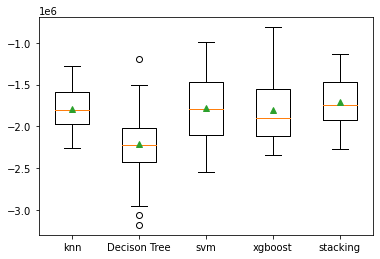

In [48]:
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [49]:
model

StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('Decison Tree', DecisionTreeRegressor()),
                              ('svm', SVR()),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow...
                                            interaction_constraints=None,
                                            learning_rate=Non

In [50]:
rms_stack=predict_model(model,x_train_scaled,y_train)
rms_stack

r2 score:  -1.0063918971322021
rms :  1095103.4652132418


1095103.4652132418

In [51]:
predictions_stack = testDataPrediction(model,x_test_scaled)
predictions_stack.to_csv('./StackingEnsembleModel.csv', index = False)

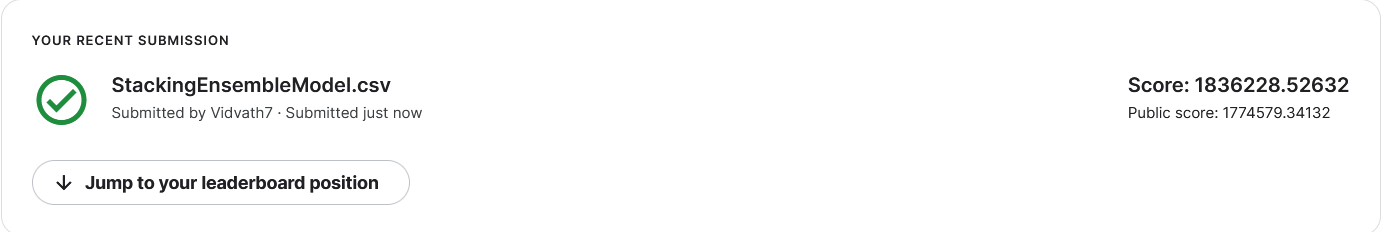

We have obtained a RMSE score of 1836228.52632 for the test data using the stacking ensemble model.